# The Correlation Coefficient

---

The correlation coefficient measures the extent to which the relationship between two variables is linear. Its value is always between -1 and 1. A positive coefficient indicates that the variables are directly related, i.e. when one increases the other one also increases. A negative coefficient indicates that the variables are inversely related, so that when one increases the other decreases. The closer to 0 the correlation coefficient is, the weaker the relationship between the variables.

The correlation coefficient of two series $X$ and $Y$ is defined as
$$r = \frac{Cov(X,Y)}{std(X)std(Y)}$$
where $Cov$ is the covariance and $std$ is the standard deviation.
$$Cov(X,Y) = \sum_{i=1}^{N} \frac{(x_{i}-\overline{x})(y_{i}-\overline{y})}{N-1}$$
and
$$std(X)=\left(\sum_{i=1}^{N}\frac{(x_{i}-\overline{x})^{2}}{N-1}\right)^{\frac{1}{2}}$$
Two random sets of data will have a correlation coefficient close to 0:

## Correlation vs. Covariance
Correlation is simply a normalized form of covariance. They are otherwise the same and are often used semi-interchangeably in everyday conversation. It is obviously important to be precise with language when discussing the two, but conceptually they are almost identical.

### Covariance isn't that meaningful by itself
Let's say we have two variables X and Y and we take the covariance of the two.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

In [30]:
X = np.random.rand(50)
Y = 2 * X + np.random.normal(0, 0.1, 50)

np.cov(X, Y)[0,1]

0.17279704616276911

So now what? What does this mean? Correlation uses information about the variance of X and Y to normalize this metric. Once we've normalized the metric to the -1 to 1 scale, we can make meaningful statements and compare correlations.

To see how this is done consider the formula.

$$\frac{Cov(X, Y)}{std(X)std(Y)}$$

$$= \frac{Cov(X, Y)}{\sqrt{var(X)}\sqrt{var(Y)}}$$

$$= \frac{Cov(X, Y)}{\sqrt{Cov(X, X)}\sqrt{Cov(Y, Y)}}$$


To demonstrate this let's compare the correlation and covariance of two series.

In [31]:
X = np.random.rand(50)
Y = 2*X + 4

print('Covariance of X and Y: \n{0}'.format(str(np.cov(X,Y))))
print('Correlation of X and Y: \n{0}'.format(str(np.corrcoef(X,Y))))

Covariance of X and Y: 
[[ 0.1015594   0.20311881]
 [ 0.20311881  0.40623762]]
Correlation of X and Y: 
[[ 1.  1.]
 [ 1.  1.]]


## Why do both `np.cov` and `np.corrcoef` return matricies?

The covariance matrix is an important concept in statistics. Often people will refer to the covariance of two variables $X$ and $Y$, but in reality that is just one entry in the covariance matrix of $X$ and $Y$. For each input variable we have one row and one column. The diagonal is just the variance of that variable, or $Cov(X, X)$, entries off the diagonal are covariances between different variables. The matrix is symmetric across the diagonal. Let's check that this is true.

In [39]:
cov_matrix = np.cov(X,Y)

# We need to manually set the degrees of freedom on X to 1,
# as numpy default to 0 for the variance
# This is usually fine, but will result in a slight mismatch
# as np.cov defaults to 1
error = cov_matrix[0,0] - X.var(ddof=1)

print('error: {0}'.format(str(error)))

error: 0.0


Correlation: -0.1043187897965321
Built-in Correlation: -0.104318789797


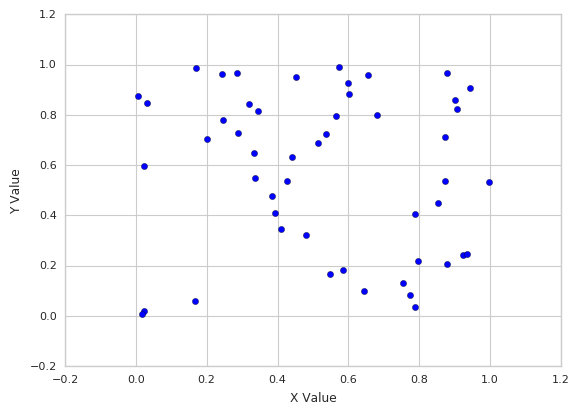

In [68]:
X = np.random.rand(50)
Y = np.random.rand(50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

# taking the relevant value from the matrix returned by np.cov
# the following line uses the correct ddof=1 for std (this is a sample calc)
# the commented line below is what quantopian had, which resulted
# in different values for the two calcs
print('Correlation: {0}'.format(np.cov(X,Y)[0,1]/(np.std(X,ddof=1)*np.std(Y,ddof=1))))
# What Quantopian had # print('Correlation: {0}'.format(np.cov(X,Y)[0,1]/(np.std(X)*np.std(Y))))

# Let's also use the builtin correlation function
print('Built-in Correlation: {0}'.format(str(np.corrcoef(X,Y)[0,1])))

Now let's see what some correlated sets of data looks like.

Correlation: 0.9660693133363376


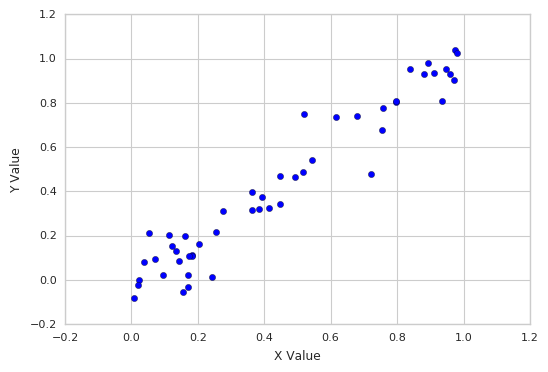

In [74]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: {0}'.format(np.corrcoef(X,Y)[0,1]))

Let's dial down the relationship by introducing more noise.

Correlation: 0.8038340521696424


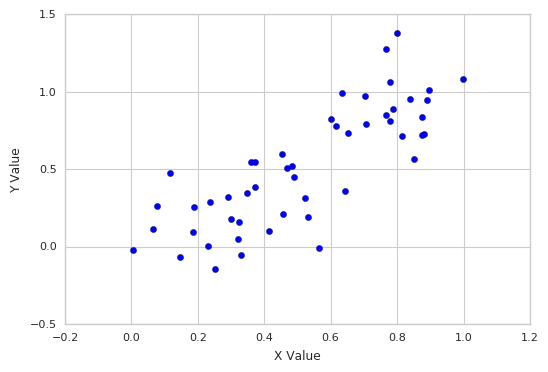

In [78]:
X = np.random.rand(50)
Y = X + np.random.normal(0, 0.2, 50) # larger std

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: {0}'.format(np.corrcoef(X,Y)[0,1]))

Finally let's see what the inverse relationship looks like.

Correlation: -0.9631628234738211


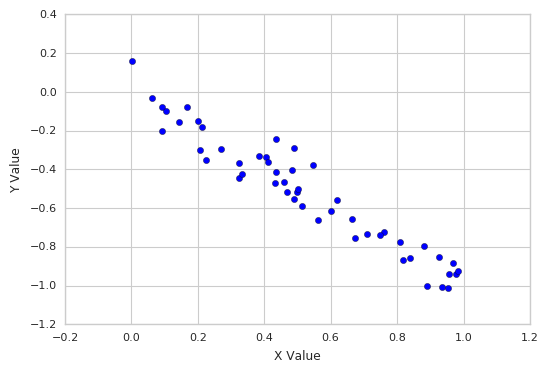

In [79]:
X = np.random.rand(50)
Y = -X + np.random.normal(0, 0.1, 50)

plt.scatter(X,Y)
plt.xlabel('X Value')
plt.ylabel('Y Value')

print('Correlation: {0}'.format(np.corrcoef(X,Y)[0,1]))

We see a little bit of rounding error, but they are clearly the same value.

## How is this useful in finance?

### Determining related assets

Once we've established that two series are probably related, we can use that in an effort to predict future values of the series. For example. let's loook at the price of Apple and a semiconductor equipment manufacturer, Lam Research Corporation.

In [4]:
import datetime
import pandas_datareader.data as web
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

LRCX and AAPL: -0.7809975334044094
LRCX and SPY: 0.9352035123218257
AAPL and SPY: -0.5899063018414382


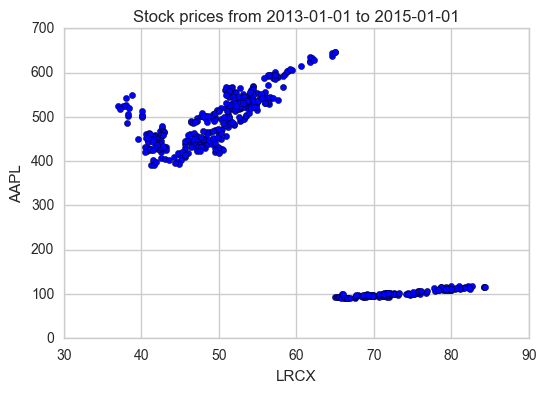

In [5]:
start = datetime.date(2013,1,1)
end = datetime.date(2015,1,1)

bench = web.DataReader('SPY', data_source='yahoo',start=start, end=end)
a1 = web.DataReader('LRCX', data_source='yahoo', start=start, end=end)
a2 = web.DataReader('AAPL', data_source='yahoo',start=start, end=end)

plt.scatter(a1.Close,a2.Close)
plt.xlabel('LRCX')
plt.ylabel('AAPL')
plt.title('Stock prices from {0} to {1}'.format(start,end))

print("LRCX and AAPL: {0}".format(np.corrcoef(a1.Close,a2.Close)[0,1]))
print("LRCX and SPY: {0}".format(np.corrcoef(a1.Close,bench.Close)[0,1]))
print("AAPL and SPY: {0}".format(np.corrcoef(bench.Close,a2.Close)[0,1]))

Ok, There appears to be a stock split on apple that has not been recorded into the price. Let's see it I can correct this. I believe that the Adj Close take this into account but I am going to write a function to do it with the regular Close.

LRCX and AAPL: 0.9595011602144493
LRCX and SPY: 0.9390678153762195
AAPL and SPY: 0.9078498638873342


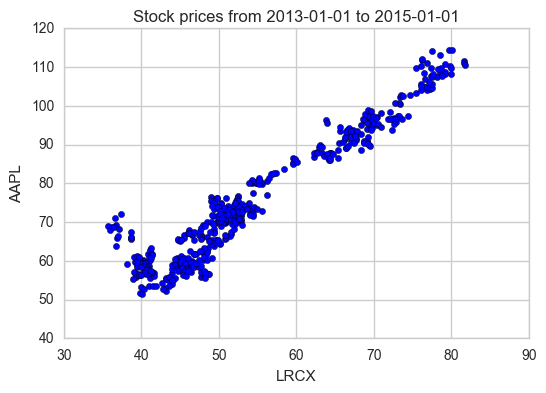

In [6]:
# First check to see that the yahoo provided adj close does the job

start = datetime.date(2013,1,1)
end = datetime.date(2015,1,1)

bench = web.DataReader('SPY', data_source='yahoo',start=start, end=end)
a1 = web.DataReader('LRCX', data_source='yahoo', start=start, end=end)
a2 = web.DataReader('AAPL', data_source='yahoo',start=start, end=end)

plt.scatter(a1['Adj Close'],a2['Adj Close'])
plt.xlabel('LRCX')
plt.ylabel('AAPL')
plt.title('Stock prices from {0} to {1}'.format(start,end))

print("LRCX and AAPL: {0}".format(np.corrcoef(a1['Adj Close'],a2['Adj Close'])[0,1]))
print("LRCX and SPY: {0}".format(np.corrcoef(a1['Adj Close'],bench['Adj Close'])[0,1]))
print("AAPL and SPY: {0}".format(np.corrcoef(bench['Adj Close'],a2['Adj Close'])[0,1]))

## On a side note:
The Yahoo adjusted close does the corrects for all the stock splits properly. However, I have decided to write a function that adjusts all fields (OHLC) for all splits in a given date range.

In [14]:
def splitAdjust(d, ticker):
    data = d.copy()
    start = data.index[0]
    end = data.index[len(data.index)-1]
    actions = web.DataReader(ticker, 'yahoo-actions', start, end)
    splits = actions[actions.action == 'SPLIT']
    
    # Find the index and date of the split
    split_idxs = {i:x for i,x in enumerate(data.index.tolist()) if x in splits.index}
    columns = data.columns.tolist()
    
    # adjust for the splits
    for idx, date in split_idxs.items():
        for col in range(len(columns)):
            if columns[col] != 'Volume' and columns[col] != 'Adj Close':
                # adjust the prices of the shares
                data.iloc[:idx, col] = data.iloc[:idx, col]*splits.loc[date].value
    return data

In [8]:
aapl = web.DataReader('AAPL', data_source='yahoo',start=start, end=end)
lrcx = web.DataReader('LRCX','yahoo', start, end)

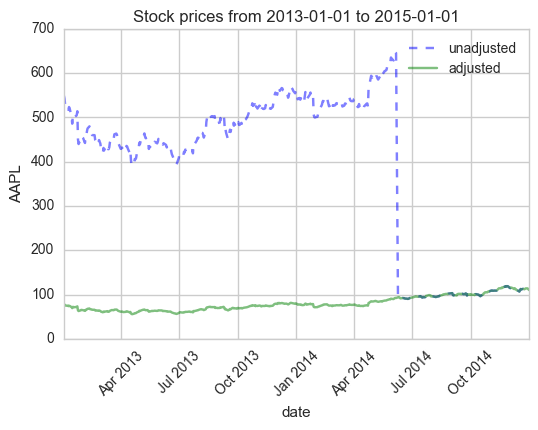

In [10]:
aapl_adj = splitAdjust(aapl, 'AAPL')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(aapl.index,aapl.Close,'b--', alpha=0.5, label='unadjusted')
ax.plot(aapl.index,aapl_adj.Close,'g-', alpha=0.5, label='adjusted')
#ax.set_yscale('log')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('date')
ax.set_ylabel('AAPL')
ax.legend()
ax.set_title('Stock prices from {0} to {1}'.format(start,end));

## Getting back to the Quantopian lecure

### Constructing a portfolio of uncorrelated assets
Another reason that correlation is useful in finace is that uncorrelated assets produce the best portfolios. The intuition for thisis that if the assets are uncorrelatedm a drawdown in one will not correspond with a drawdown in another. This leads to a very stable return stream when many uncorrelated assets are combined

# Limitations 

## Significance

It's hard to rigorously determine whether or not a correlation is significant, especially when, as here, the variables are not normally distributed. Their correlation coefficient is close to 1, so it's pretty safe to say that the two stock prices are correlated over the time period we use, but is this indicative of future correlation? If we examine the correlation of each of them with the S&P 500, we see that it is also quite high. So, AAPL and LRCX are slightly more correlated with each other than with the average stock.

One fundamental problem is that it is easy to datamine correlations by picking the right time period. To avoid this, one should compute the correlation of two quantities over many historical time periods and examine the distibution of the correlation coefficient. More details on why single point estimates are bad will be covered in future notebooks.

As an example, remember that the correlation of AAPL and LRCX from 2013-1-1 to 2015-1-1 was 0.95. Let's take the rolling 60 day correlation between the two to see how that varies.

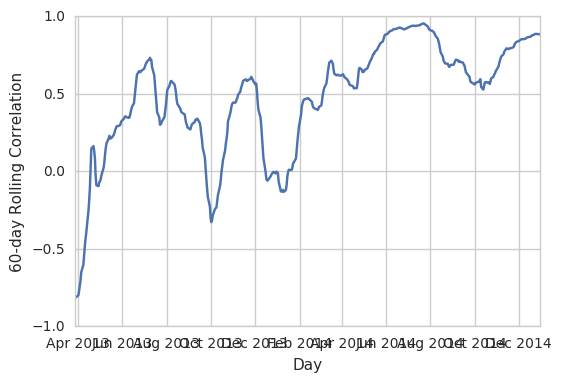

In [183]:
rolling_correlation = a1['Adj Close'].rolling(window=60).corr(a2['Adj Close'])
plt.plot(rolling_correlation)
plt.xlabel('Day')
plt.ylabel('60-day Rolling Correlation')

## Non-Linear Relationships

The correlation coefficient can be useful for examining the strength of the relationship between two variables. However, it's important to remember that two variables may be associated in different, predictable ways which this analysis would not pick up. For instance, one variable might precisely follow the behavior of a second, but with a delay. There are techniques for dealing with this lagged correlation. Alternatively, a variable may be related to the rate of change of another. Neither of these relationships are linear, but can be very useful if detected.

Additionally, the correlation coefficient can be very sensitive to outliers. This means that including or excluding even a couple of data points can alter your result, and it is not always clear whether these points contain information or are simply noise.

As an example, let's make the noise distribution poisson rather than normal and see what happens.

0.27473065586658058

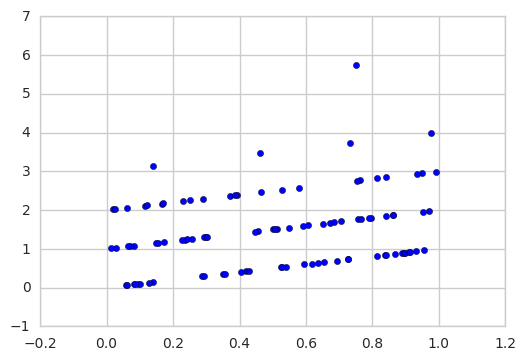

In [184]:
X = np.random.rand(100)
Y = X + np.random.poisson(size=100)

plt.scatter(X,Y)

np.corrcoef(X,Y)[0,1]

In conclusion, correlation is a powerful technique, but as always in statistics, one should be careful not to interpret results where there are none.